In [1]:
import tensorflow as tf
tf.config.experimental.list_physical_devices('GPU')
import numpy as np
import pandas as pd
import seaborn as sns
import time
import matplotlib.pyplot as plt
from pandas.api.types import is_numeric_dtype
import warnings
from sklearn import tree
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay, RocCurveDisplay, auc
from sklearn.metrics import precision_score, recall_score, f1_score, roc_curve
from sklearn.metrics import precision_recall_curve, PrecisionRecallDisplay, roc_auc_score
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.tree  import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, VotingClassifier, GradientBoostingClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.feature_selection import RFE
import itertools
from xgboost import XGBClassifier
from tabulate import tabulate
pd.set_option('display.max_columns', None)

print(tf.test.gpu_device_name())

In [2]:
from pyspark.sql import SparkSession
from pyspark.sql.functions import col

# Create a SparkSession
spark = SparkSession.builder.getOrCreate()

# List the paths of the CSV files you want to combine
file_paths = ["E:/PhD-CS_Study Stuff_BDALab_PC/Nisha ciciot 2023/data/CICIoT2023/part-00094-363d1ba3-8ab5-4f96-bc25-4d5862db7cb9-c000.csv","E:/PhD-CS_Study Stuff_BDALab_PC/Nisha ciciot 2023/data/CICIoT2023/part-00095-363d1ba3-8ab5-4f96-bc25-4d5862db7cb9-c000.csv","E:/PhD-CS_Study Stuff_BDALab_PC/Nisha ciciot 2023/data/CICIoT2023/part-00096-363d1ba3-8ab5-4f96-bc25-4d5862db7cb9-c000.csv"]#,"E:/PhD-CS_Study Stuff_BDALab_PC/Nisha ciciot 2023/data/CICIoT2023/part-00097-363d1ba3-8ab5-4f96-bc25-4d5862db7cb9-c000.csv","E:/PhD-CS_Study Stuff_BDALab_PC/Nisha ciciot 2023/data/CICIoT2023/part-00098-363d1ba3-8ab5-4f96-bc25-4d5862db7cb9-c000.csv","E:/PhD-CS_Study Stuff_BDALab_PC/Nisha ciciot 2023/data/CICIoT2023/part-00099-363d1ba3-8ab5-4f96-bc25-4d5862db7cb9-c000.csv"]

# Read the CSV files into individual DataFrames
dataframes = [spark.read.csv(file_path, header=True, inferSchema=True) for file_path in file_paths]

# Combine the DataFrames into a single DataFrame
combined_df = dataframes[0]
for df in dataframes[1:]:
    combined_df = combined_df.union(df)

# Write the combined DataFrame to a single CSV file
output_path = 'combined_file.csv'
combined_df.coalesce(1).write.csv(output_path, header=True, mode='overwrite')


In [4]:
df = pd.read_csv(r"C:\Users\nvnS\combined_file.csv\part-00000-db862888-1331-421f-a159-7a2066fbc68e-c000.csv")
df

,flow_duration,Header_Length,Protocol Type,Duration,Rate,Srate,Drate,fin_flag_number,syn_flag_number,rst_flag_number,psh_flag_number,ack_flag_number,ece_flag_number,cwr_flag_number,ack_count,syn_count,fin_count,urg_count,rst_count,HTTP,HTTPS,DNS,Telnet,SMTP,SSH,IRC,TCP,UDP,DHCP,ARP,ICMP,IPv,LLC,Tot sum,Min,Max,AVG,Std,Tot size,IAT,Number,Magnitue,Radius,Covariance,Variance,Weight,label
0,145.349048,1.249712e+05,7.100000,61.900000,5.462682,5.462682,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.00,0.00,0.0,410.60,839.10,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1764.300000,207.8,791.000000,420.887619,262.360861,218.400000,1.832850e-02,5.500000,28.216368,371.034289,8.655953e+04,0.800000,38.500000,BenignTraffic
1,0.000000,5.346000e+01,5.940000,63.360000,1.331135,1.331135,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,567.300000,54.0,54.300000,54.016771,0.068860,54.060000,8.307591e+07,9.500000,10.393931,0.097836,9.581371e-02,0.050000,141.550000,DDoS-TCP_Flood
2,0.000000,5.346000e+01,5.940000,63.360000,2.784057,2.784057,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.00,0.00,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,567.780000,54.0,54.780000,54.060293,0.205798,54.060000,8.307637e+07,9.500000,10.398108,0.291496,3.322360e-01,0.130000,141.550000,DDoS-TCP_Flood
3,74.158594,5.942505e+06,6.000000,231.000000,72.850626,72.850626,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.00,2.00,0.0,201.00,5401.50,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,363.000000,66.0,66.000000,66.000000,0.000000,66.000000,3.259182e-05,5.500000,11.489125,0.000000,0.000000e+00,0.000000,38.500000,BenignTraffic
4,0.074977,2.364779e+04,16.764706,66.808824,8238.272991,8238.272991,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,492.941176,50.0,53.235294,50.226109,0.819111,50.294118,7.332524e+07,8.911765,10.022524,1.160624,4.204338e+00,0.161765,127.897059,DDoS-UDP_Flood
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1127970,0.187299,1.272810e+04,6.000000,93.500000,106.685077,106.685077,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.00,2.00,0.0,6.40,17.30,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,14160.600000,66.0,4773.200000,896.710629,1382.332828,1132.500000,1.664392e+08,13.500000,42.229021,1958.145619,1.963026e+06,1.000000,244.600000,Recon-OSScan
1127971,136.208122,2.646228e+05,7.100000,82.600000,11.154962,11.154962,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.00,0.00,0.0,735.00,1541.50,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,6550.400000,629.2,1474.000000,1278.528492,335.714020,965.000000,1.609530e-02,5.500000,50.438059,474.771321,1.892648e+05,0.600000,38.500000,BenignTraffic
1127972,0.005463,6.552000e+01,6.000000,64.000000,22.092778,22.092778,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.01,0.04,0.0,0.02,0.09,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,571.320000,54.0,58.320000,54.523458,1.313108,54.240000,8.303724e+07,9.500000,10.442218,1.858832,5.091341e+00,0.360000,141.550000,DDoS-TCP_Flood
1127973,0.000000,0.000000e+00,1.000000,64.000000,29.592630,29.592630,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,441.000000,42.0,42.000000,42.000000,0.000000,42.000000,8.313214e+07,9.500000,9.165151,0.000000,0.000000e+00,0.000000,141.550000,DDoS-ICMP_Flood


In [5]:
df['label'].value_counts()

DDoS-ICMP_Flood            173622
DDoS-UDP_Flood             131353
DDoS-TCP_Flood             108874
DDoS-SYN_Flood              98293
DDoS-PSHACK_Flood           98252
DDoS-RSTFINFlood            97586
DDoS-SynonymousIP_Flood     87122
DoS-UDP_Flood               80303
DoS-TCP_Flood               64482
DoS-SYN_Flood               49305
BenignTraffic               26641
Mirai-greeth_flood          23874
Mirai-udpplain              21391
Mirai-greip_flood           17996
DDoS-ICMP_Fragmentation     10943
MITM-ArpSpoofing             7537
DDoS-UDP_Fragmentation       6859
DDoS-ACK_Fragmentation       6721
DNS_Spoofing                 4319
Recon-HostDiscovery          3238
Recon-OSScan                 2327
Recon-PortScan               1997
DoS-HTTP_Flood               1811
VulnerabilityScan             872
DDoS-HTTP_Flood               683
DDoS-SlowLoris                581
DictionaryBruteForce          311
BrowserHijacking              159
SqlInjection                  145
CommandInjecti

In [6]:
#Visualization
def bar_graph(feature):
    df[feature].value_counts().plot(kind="bar")

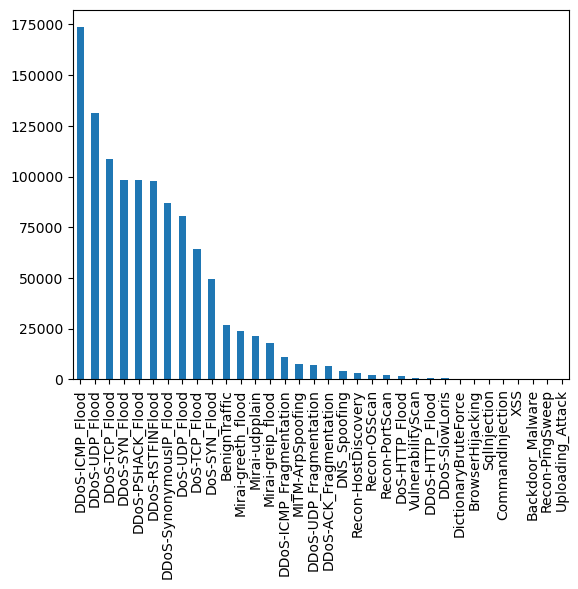

In [7]:
bar_graph('label')

In [8]:
df['label'].unique()

array(['BenignTraffic', 'DDoS-TCP_Flood', 'DDoS-UDP_Flood',
       'DDoS-RSTFINFlood', 'DDoS-ICMP_Flood', 'DDoS-SynonymousIP_Flood',
       'MITM-ArpSpoofing', 'DDoS-SYN_Flood', 'DoS-SYN_Flood',
       'Mirai-greip_flood', 'DoS-UDP_Flood', 'Mirai-udpplain',
       'Mirai-greeth_flood', 'DDoS-PSHACK_Flood', 'DoS-TCP_Flood',
       'DDoS-ACK_Fragmentation', 'Recon-OSScan', 'Recon-HostDiscovery',
       'DDoS-ICMP_Fragmentation', 'VulnerabilityScan', 'DNS_Spoofing',
       'DDoS-UDP_Fragmentation', 'DoS-HTTP_Flood', 'BrowserHijacking',
       'DDoS-HTTP_Flood', 'Recon-PortScan', 'DDoS-SlowLoris',
       'SqlInjection', 'CommandInjection', 'DictionaryBruteForce',
       'Backdoor_Malware', 'XSS', 'Uploading_Attack', 'Recon-PingSweep'],
      dtype=object)

In [9]:
#encoding categorical data
from sklearn.preprocessing import LabelEncoder

enc=LabelEncoder()
df['label']=enc.fit_transform(df['label'])
df

,flow_duration,Header_Length,Protocol Type,Duration,Rate,Srate,Drate,fin_flag_number,syn_flag_number,rst_flag_number,psh_flag_number,ack_flag_number,ece_flag_number,cwr_flag_number,ack_count,syn_count,fin_count,urg_count,rst_count,HTTP,HTTPS,DNS,Telnet,SMTP,SSH,IRC,TCP,UDP,DHCP,ARP,ICMP,IPv,LLC,Tot sum,Min,Max,AVG,Std,Tot size,IAT,Number,Magnitue,Radius,Covariance,Variance,Weight,label
0,145.349048,1.249712e+05,7.100000,61.900000,5.462682,5.462682,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.00,0.00,0.0,410.60,839.10,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1764.300000,207.8,791.000000,420.887619,262.360861,218.400000,1.832850e-02,5.500000,28.216368,371.034289,8.655953e+04,0.800000,38.500000,1
1,0.000000,5.346000e+01,5.940000,63.360000,1.331135,1.331135,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,567.300000,54.0,54.300000,54.016771,0.068860,54.060000,8.307591e+07,9.500000,10.393931,0.097836,9.581371e-02,0.050000,141.550000,13
2,0.000000,5.346000e+01,5.940000,63.360000,2.784057,2.784057,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.00,0.00,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,567.780000,54.0,54.780000,54.060293,0.205798,54.060000,8.307637e+07,9.500000,10.398108,0.291496,3.322360e-01,0.130000,141.550000,13
3,74.158594,5.942505e+06,6.000000,231.000000,72.850626,72.850626,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.00,2.00,0.0,201.00,5401.50,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,363.000000,66.0,66.000000,66.000000,0.000000,66.000000,3.259182e-05,5.500000,11.489125,0.000000,0.000000e+00,0.000000,38.500000,1
4,0.074977,2.364779e+04,16.764706,66.808824,8238.272991,8238.272991,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,492.941176,50.0,53.235294,50.226109,0.819111,50.294118,7.332524e+07,8.911765,10.022524,1.160624,4.204338e+00,0.161765,127.897059,14
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1127970,0.187299,1.272810e+04,6.000000,93.500000,106.685077,106.685077,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.00,2.00,0.0,6.40,17.30,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,14160.600000,66.0,4773.200000,896.710629,1382.332828,1132.500000,1.664392e+08,13.500000,42.229021,1958.145619,1.963026e+06,1.000000,244.600000,27
1127971,136.208122,2.646228e+05,7.100000,82.600000,11.154962,11.154962,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.00,0.00,0.0,735.00,1541.50,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,6550.400000,629.2,1474.000000,1278.528492,335.714020,965.000000,1.609530e-02,5.500000,50.438059,474.771321,1.892648e+05,0.600000,38.500000,1
1127972,0.005463,6.552000e+01,6.000000,64.000000,22.092778,22.092778,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.01,0.04,0.0,0.02,0.09,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,571.320000,54.0,58.320000,54.523458,1.313108,54.240000,8.303724e+07,9.500000,10.442218,1.858832,5.091341e+00,0.360000,141.550000,13
1127973,0.000000,0.000000e+00,1.000000,64.000000,29.592630,29.592630,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,441.000000,42.0,42.000000,42.000000,0.000000,42.000000,8.313214e+07,9.500000,9.165151,0.000000,0.000000e+00,0.000000,141.550000,6


In [10]:
x=df.drop(columns=['label'])
y=df['label']

In [11]:
y

0           1
1          13
2          13
3           1
4          14
           ..
1127970    27
1127971     1
1127972    13
1127973     6
1127974    14
Name: label, Length: 1127975, dtype: int32

In [12]:
#splitting the dataset into the training set and test set
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)

In [13]:
print("Training set:", len(x_train))
print("Testing set:", len(x_test))

Training set: 902380
Testing set: 225595


In [14]:
#feature scaling
from sklearn.preprocessing import StandardScaler
sc_x = StandardScaler()
x_train = sc_x.fit_transform(x_train)
x_test = sc_x.transform(x_test)

In [15]:
from sklearn.linear_model import LogisticRegression
clf=LogisticRegression()
clf.fit(x_train,y_train)

log_acc=clf.score(x_test,y_test)
pred=clf.predict(x_test)

log_prec=precision_score(y_test,pred,average='weighted')
log_rec=recall_score(y_test,pred,average='weighted')
log_f1=f1_score(y_test,pred,average='weighted')

print('accuracy:',log_acc)
print('precision:', log_prec)
print('recall: ', log_rec)
print('f1: ', log_f1)

C:\ProgramData\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


accuracy: 0.8004122431791485
precision: 0.805995506058236
recall:  0.8004122431791485
f1:  0.7663578394105349


C:\ProgramData\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [16]:
from sklearn.ensemble import RandomForestClassifier
clf1=RandomForestClassifier(n_estimators=100)
clf1.fit(x_train,y_train)
rf_acc=clf1.score(x_test,y_test)
pred=clf1.predict(x_test)

rf_prec=precision_score(y_test,pred,average='weighted')
rf_rec=recall_score(y_test,pred,average='weighted')
rf_f1=f1_score(y_test,pred,average='weighted')

print('accuracy:',rf_acc)
print('precision:', rf_prec)
print('recall: ', rf_rec)
print('f1: ', rf_f1)

accuracy: 0.993328752853565
precision: 0.9929979664646189
recall:  0.993328752853565
f1:  0.9927860853065671


C:\ProgramData\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [17]:
from sklearn.ensemble import AdaBoostClassifier

clf2=AdaBoostClassifier()
clf2.fit(x_train,y_train)
ada_acc=clf2.score(x_test,y_test)
pred=clf2.predict(x_test)

ada_prec=precision_score(y_test,pred,average='weighted')
ada_rec=recall_score(y_test,pred,average='weighted')
ada_f1=f1_score(y_test,pred,average='weighted')

print('accuracy:',ada_acc)
print('precision:', ada_prec)
print('recall: ', ada_rec)
print('f1: ', ada_f1)

accuracy: 0.801538154657683
precision: 0.7391963405827369
recall:  0.801538154657683
f1:  0.7404003833764086


C:\ProgramData\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [19]:
from sklearn.ensemble import GradientBoostingClassifier
clf3=GradientBoostingClassifier()
clf3.fit(x_train,y_train)
print('accuracy', clf3.score(x_test,y_test))

pred=clf3.predict(x_test)

print('precision: ', precision_score(y_test,pred,average='weighted'))
print('recall: ', recall_score(y_test,pred,average='weighted'))
print('f1:', f1_score(y_test,pred,average='weighted'))

accuracy 0.9858184255729189
precision:  0.9861669104580681
recall:  0.9858184255729189
f1: 0.9856663439882749


C:\ProgramData\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# neural network

In [18]:
from tensorflow.keras.layers import Input, Dense 
from tensorflow.keras.models import Model
from tensorflow.keras.utils import plot_model
from tensorflow.keras.models import load_model
from tensorflow.keras.layers import LSTM, Dense, Bidirectional, Dropout,SimpleRNN,Input,GRU
from tensorflow.keras.models import Sequential
from keras.callbacks import ModelCheckpoint, CSVLogger
from keras.utils.np_utils import to_categorical


In [19]:
Y = to_categorical(y)
Y

array([[0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [20]:
#splitting the dataset into the training set and test set
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, Y, test_size = 0.2, random_state = 42, stratify=Y)

print(x_train.shape)
print(y_train.shape)

print(x_test.shape)
print(y_test.shape)

(902380, 46)
(902380, 34)
(225595, 46)
(225595, 34)


In [21]:
#feature scaling
from sklearn.preprocessing import StandardScaler
sc_x = StandardScaler()
x_train = sc_x.fit_transform(x_train)
x_test = sc_x.transform(x_test)

In [22]:

input_=Input(shape=(x_train.shape[1],))
d=Dense(100, activation='relu')(input_)
d=Dense(100, activation='relu') (d)
d=Dense(100, activation='relu') (d)
d=Dense(100, activation='relu') (d)
d=Dense(100, activation='relu') (d)
d=Dense(100, activation='relu') (d)
output = Dense(34, activation='softmax')(d)

model = Model(inputs=input_, outputs=output)
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

model.summary()


Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 46)]              0         
                                                                 
 dense (Dense)               (None, 100)               4700      
                                                                 
 dense_1 (Dense)             (None, 100)               10100     
                                                                 
 dense_2 (Dense)             (None, 100)               10100     
                                                                 
 dense_3 (Dense)             (None, 100)               10100     
                                                                 
 dense_4 (Dense)             (None, 100)               10100     
                                                                 
 dense_5 (Dense)             (None, 100)               10100 

In [23]:
#callbacks: checkpoint, csv_logger
filepath="nn.hdf5"
checkpoint = ModelCheckpoint(filepath, monitor='val_accuracy', verbose=1, save_best_only=True, mode='max')
csv_log=CSVLogger('nn_log.csv',separator=',',append=False)
callbacks_list=[checkpoint,csv_log]

history=model.fit(x_train, y_train, epochs=20, batch_size=64, validation_split=0.2, callbacks=callbacks_list)

Epoch 1/20
11252/11280 [============================>.] - ETA: 0s - loss: 0.3675 - accuracy: 0.8432
Epoch 1: val_accuracy improved from -inf to 0.90686, saving model to nn.hdf5
11280/11280 [==============================] - 20s 2ms/step - loss: 0.3671 - accuracy: 0.8434 - val_loss: 0.3306 - val_accuracy: 0.9069
Epoch 2/20
11249/11280 [============================>.] - ETA: 0s - loss: 0.1341 - accuracy: 0.9498
Epoch 2: val_accuracy improved from 0.90686 to 0.95952, saving model to nn.hdf5
11280/11280 [==============================] - 19s 2ms/step - loss: 0.1340 - accuracy: 0.9498 - val_loss: 0.0896 - val_accuracy: 0.9595
Epoch 3/20
11253/11280 [============================>.] - ETA: 0s - loss: 0.0939 - accuracy: 0.9662
Epoch 3: val_accuracy improved from 0.95952 to 0.97444, saving model to nn.hdf5
11280/11280 [==============================] - 19s 2ms/step - loss: 0.0939 - accuracy: 0.9662 - val_loss: 0.0751 - val_accuracy: 0.9744
Epoch 4/20
11278/11280 [============================>.]

Text(0, 0.5, 'accuracy')

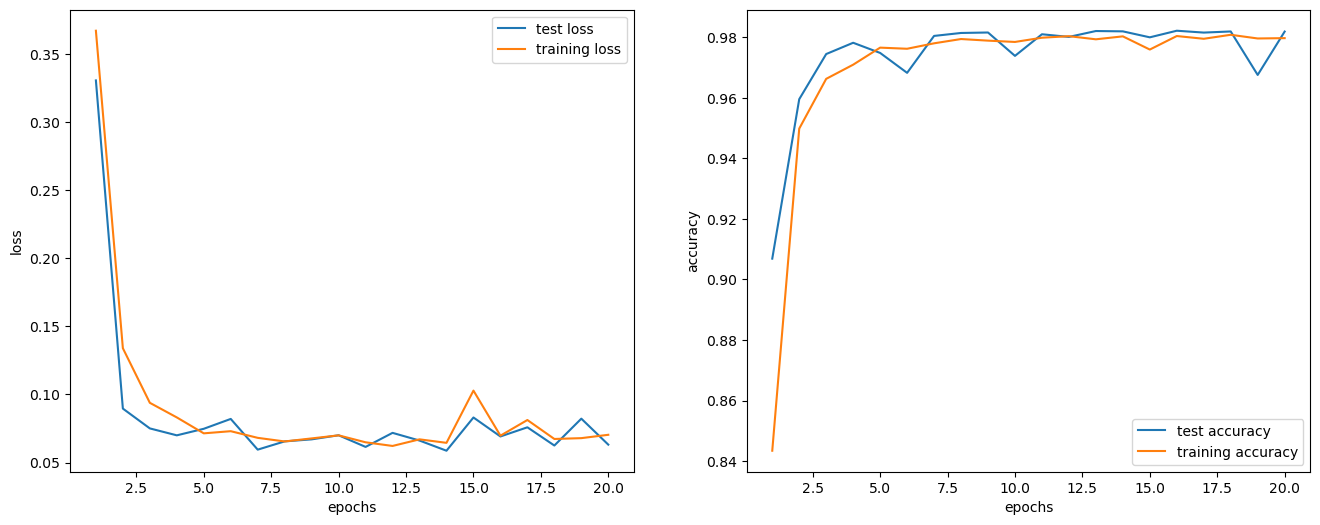

In [24]:
plt.figure(figsize=(16,6))

plt.subplot(1,2,1)
plt.plot(np.arange(1,21,1),history.history['val_loss'], label='test loss')
plt.plot(np.arange(1,21,1),history.history['loss'], label='training loss')
plt.legend()
plt.xlabel('epochs')
plt.ylabel('loss')

plt.subplot(1,2,2)
plt.plot(np.arange(1,21,1),history.history['val_accuracy'], label='test accuracy')
plt.plot(np.arange(1,21,1),history.history['accuracy'], label='training accuracy')
plt.legend()
plt.xlabel('epochs')
plt.ylabel('accuracy')

In [25]:
#load the best model
dnn=load_model('nn.hdf5')

#getting the probabilities
pred=dnn.predict(x_test)
pred
dnn_pred=pred.argmax(axis=1)
y_test1=y_test.argmax(axis=1)
accuracy_score(y_test.argmax(axis=1),pred.argmax(axis=1))
print('Precision score: ',precision_score(y_test1, dnn_pred, average='weighted'))
print('Recall score: ',recall_score(y_test1, dnn_pred,average='weighted'))
print('F1 score: ',f1_score(y_test1, dnn_pred,average='weighted'))

7050/7050 [==============================] - 5s 731us/step
Precision score:  0.979045864035274
Recall score:  0.9813559697688335
F1 score:  0.9793998981088207


C:\ProgramData\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
